## Unsupervised Learning to Predict Race from Merged Dataset

In [23]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Inspect

In [24]:
full_data_df = pd.read_csv('final_merged.csv')
full_data_df

print("Shape of the data: ", full_data_df.shape)

full_data_df.info()
full_data_df.head()

Shape of the data:  (9222, 135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222 entries, 0 to 9221
Columns: 135 entries, Patient ID to Survival Months
dtypes: float64(74), int64(2), object(59)
memory usage: 9.5+ MB


C:\Users\smcca\AppData\Local\Temp\ipykernel_48032\3584519652.py:1: DtypeWarning: Columns (5,7,12,15,16,17,18,30,65,82,83,91,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data_df = pd.read_csv('final_merged.csv')


,Patient ID,Age,Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Marital Status,T Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,MB-0110,45,1.0,Breast Cancer,Invasive Breast Carcinoma,Low,0.0,claudin-low,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MB-0156,60,1.0,Breast Cancer,Invasive Breast Carcinoma,Low,0.0,claudin-low,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MB-0159,51,1.0,Breast Cancer,Invasive Breast Carcinoma,Low,0.0,Basal,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MB-0230,41,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0.0,Her2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MB-0281,52,1.0,Breast Sarcoma,Breast Angiosarcoma,NaN,0.0,claudin-low,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
'Radio Therapy' in full_data_df.columns

True

In [4]:
'Clinical Response, Evaluated Through Imaging ' in full_data_df.columns

True

In [5]:
full_data_df['Radio Therapy'].value_counts()

Radio Therapy
0.0    5702
1.0    1233
Name: count, dtype: int64

In [6]:
full_data_df['Chemotherapy'].value_counts()

Chemotherapy
0.0    4613
1.0    2252
Name: count, dtype: int64

In [7]:
full_data_df['T Stage'].value_counts()

T Stage
2.0    4053
1.0    3484
3.0     802
4.0     132
0.0      24
Name: count, dtype: int64

In [8]:
full_data_df['Survival Months'].value_counts()

Survival Months
69.0     119
63.0     116
66.0     115
102.0    114
50.0     109
        ... 
7.0        5
26.0       5
11.0       4
2.0        4
1.0        1
Name: count, Length: 107, dtype: int64

In [9]:
full_data_df['N Stage'].value_counts()

N Stage
1.0    4779
2.0     874
0.0     529
3.0     507
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define target
target_col = 'Survival Months'

# Select numeric features
num_features = full_data_df.select_dtypes(include=[np.number])
num_features = num_features.drop(columns=[target_col])


In [26]:
# Define the threshold (60% of the total number of rows)
threshold = 0.2 * len(full_data_df)

# Drop columns where the number of NaN values is greater than the threshold
full_data_df_cleaned = full_data_df.dropna(thresh=threshold, axis=1)

In [27]:
num_features

,Age,Surgery,Chemotherapy,Cohort,ER,Neoplasm Histologic Grade,HER2,Histologic type,Lymph nodes examined positive,Mutation Count,...,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure),Race,N Stage,Regional Node Examined,Reginol Node Positive
0,45,1.0,0.0,1.0,0.0,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,1.0,0.0,1.0,0.0,1.0,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51,1.0,0.0,1.0,0.0,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,1.0,0.0,1.0,0.0,NaN,0.0,0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52,1.0,0.0,1.0,0.0,NaN,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,43,0.0,NaN,1.0,0.0,3.0,0.0,0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9218,59,0.0,NaN,1.0,0.0,2.0,0.0,0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9219,64,0.0,NaN,1.0,0.0,2.0,0.0,0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9220,72,0.0,NaN,9.0,0.0,3.0,0.0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
len(num_features.columns)

75

In [29]:
# Ensure num_features only contains numeric columns

from sklearn.impute import SimpleImputer
# Initialize the imputer to fill NaNs with the mean
imputer = SimpleImputer(strategy='mean')

# Ensure that num_features only contains numeric columns
num_features = full_data_df.select_dtypes(include=[np.number])

# Check the shape of num_features to make sure it has the expected number of columns
print("Shape of num_features:", num_features.shape)

# List of columns in num_features
print("Columns in num_features:", num_features.columns)
print("Shape of num_features:", num_features.shape)


# Apply the imputer to your DataFrame
full_data_df_imputed = pd.DataFrame(imputer.fit_transform(num_features),columns=num_features.columns)

# Check the result
print(full_data_df_imputed.isna().sum())  # Should show 0 NaN values


Shape of num_features: (9222, 76)
Columns in num_features: Index(['Age', 'Surgery', 'Chemotherapy', 'Cohort', 'ER',
       'Neoplasm Histologic Grade', 'HER2', 'Histologic type',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)', 'PR',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Tumor Size',
       'T Stage', 'Days to MRI (From the Date of Diagnosis)', 'Manufacturer',
       'Manufacturer Model Name', 'Scan Options', 'Field Strength (Tesla)',
       'Patient Position During MRI', 'Contrast Agent',
       'Contrast Bolus Volume (mL)', 'TR (Repetition Time)', 'TE (Echo Time)',
       'Acquisition Matrix', 'Slice Thickness ', 'Rows', 'Columns',
       'Reconstruction Diameter ', 'Flip Angle ',
       'FOV Computed (Field of View) in cm ', 'Date of Birth (Days)',
       'Menopause (at diagnosis)', 'Race and Ethnicity',
       'Metastatic at Presentation (Outside of Lymph Nodes)', 'Mol Subtype',
       'O

Mean Squared Error: 307.16179089356694
R^2 Score: -0.018432886493055856


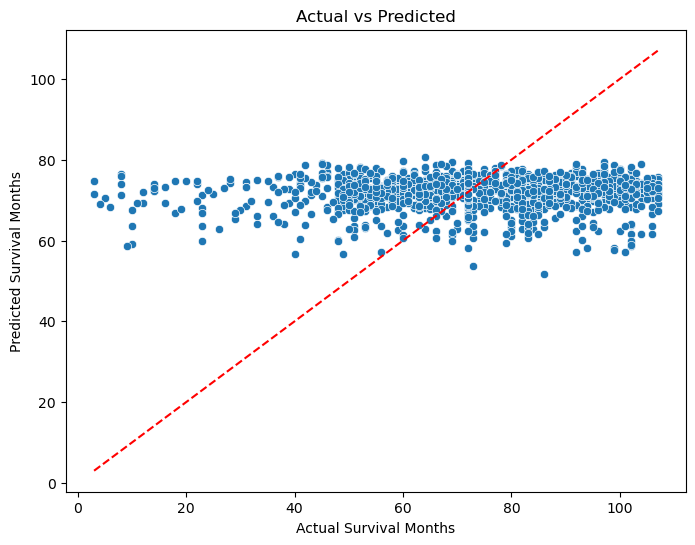

In [31]:
target_col = 'Survival Months'

# Define features and target from the imputed DataFrame
X = full_data_df_imputed  # Features from imputed data
y = full_data_df_imputed[target_col]  # Target from imputed data

# Drop the target column from X (features)
X = X.drop(columns=[target_col])

# Drop NaNs from features and align target
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Optional: plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Survival Months")
plt.ylabel("Predicted Survival Months")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

ValueError: could not convert string to float: 'Positive'

## Data Cleaning

In [15]:
#Dropping any duplicate rows
full_data_df.drop_duplicates(inplace=True)

print('Radio Therapy' in full_data_df.columns)

# Drop features with a lot of missing values
missing__ratio = full_data_df.isnull().mean()
columns_to_drop = missing__ratio[missing__ratio > 0.9].index
full_data_df.drop(columns=columns_to_drop, inplace=True)


print('Radio Therapy' in full_data_df.columns)

True
True


In [16]:
# Look at new shape of the data
print("Shape of the data after dropping columns with a lot of missing values: ", full_data_df.shape)

Shape of the data after dropping columns with a lot of missing values:  (9221, 135)


In [17]:
#inspecting the race column
full_data_df['Overall Near-complete Response:  Stricter Definition'].value_counts(dropna=False)

#Drop rows with missing values in Race column

full_data_df = full_data_df.dropna(subset=['Overall Near-complete Response:  Stricter Definition'])

#Drop rows where race is = 0
full_data_df = full_data_df[full_data_df['Overall Near-complete Response:  Stricter Definition'] != 0]

full_data_df['Overall Near-complete Response:  Stricter Definition'].value_counts()

full_data_df.drop('Clinical Response, Evaluated Through Imaging ',axis=1)

full_data_df.drop('Pathologic Response to Neoadjuvant Therapy',axis=1)

full_data_df.drop('Pathologic Response to Neoadjuvant Therapy',axis=1)

full_data_df.drop('Overall Near-complete Response:  Looser Definition',axis=1)

full_data_df.drop('Near-complete Response (Graded Measure)',axis=1)



full_data_df['Radio Therapy']


2739    0.0
3731    0.0
3737    0.0
3738    0.0
3739    0.0
       ... 
5627    0.0
6816    1.0
6817    1.0
6818    1.0
6934    1.0
Name: Radio Therapy, Length: 572, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define target
target_col = 'Overall Near-complete Response:  Stricter Definition'



# Define features and target
X = full_data_df[['Radio Therapy','Chemotherapy', 'Tumor Size','Age','T Stage','Survival Months']]
y = full_data_df[target_col]

# Drop NaNs from features and align target
X = X.dropna()
y = y.loc[X.index]

# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Re-align X and y again just to be sure
X = X.loc[y.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Ready to test different subset sizes



In [19]:
X_train


,Radio Therapy,Chemotherapy,Tumor Size,Age,T Stage,Survival Months
4055,0.0,1.0,17.0,49,1.0,50.0
3739,0.0,1.0,10.0,60,1.0,51.0
4249,0.0,1.0,16.0,40,1.0,66.0
4199,0.0,1.0,10.0,47,1.0,85.0
5573,0.0,1.0,69.0,54,3.0,74.0
...,...,...,...,...,...,...
4216,0.0,1.0,16.0,47,1.0,76.0
4298,0.0,1.0,20.0,59,1.0,99.0
4449,0.0,1.0,40.0,51,2.0,67.0
4749,0.0,1.0,34.0,59,2.0,81.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define target
target_col = 'Overall Near-complete Response:  Stricter Definition'

# Define features and target
X = full_data_df[['Radio Therapy','Chemotherapy', 'Tumor Size','Age','T Stage','Survival Months']]
y = full_data_df[target_col]

# Drop NaNs from features and align target
X = X.dropna()
y = y.loc[X.index]

# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Re-align X and y again just to be sure
X = X.loc[y.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Ready to test different subset sizes



In [10]:
results = {}


Feature Subset Size: 4
Selected Features: ['Radio Therapy', 'Chemotherapy', 'Age', 'T Stage']
Accuracy: 0.7030


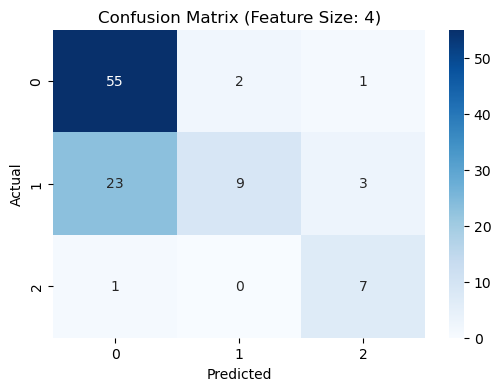

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

selected_features = ['Radio Therapy','Chemotherapy','Age','T Stage']

model = GaussianNB()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])

acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

size = 4

results[size] = {
    "features": selected_features,
    "accuracy": acc,
    "conf_matrix": conf_matrix
}

print(f"\nFeature Subset Size: {size}")
print("Selected Features:", selected_features)
print(f"Accuracy: {acc:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Feature Size: {size})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## EDA

In [12]:
full_data_df.describe()

,Age,Surgery,Chemotherapy,Cohort,ER,Neoplasm Histologic Grade,HER2,Histologic type,Lymph nodes examined positive,Mutation Count,...,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure),Race,N Stage,Regional Node Examined,Reginol Node Positive,Survival Months
count,572.000000,27.0,572.000000,0.0,572.000000,0.0,572.000000,572.000000,0.0,0.0,...,378.000000,376.000000,572.000000,572.000000,572.000000,572.000000,568.000000,503.000000,503.000000,503.000000
mean,50.846154,0.0,0.998252,NaN,0.603147,NaN,0.477273,0.669580,NaN,NaN,...,0.142857,-0.997340,1.503497,1.503497,3.524476,1.152098,1.010563,12.789264,2.075547,71.854871
std,7.900039,0.0,0.041812,NaN,0.489673,NaN,0.499920,0.496133,NaN,NaN,...,0.515761,0.051571,0.649657,0.649657,5.058789,0.631579,0.432247,8.106815,2.453199,22.094888
min,21.000000,0.0,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,...,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000
25%,47.000000,0.0,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,58.000000
50%,53.000000,0.0,1.000000,NaN,1.000000,NaN,0.000000,1.000000,NaN,NaN,...,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,73.000000
75%,58.000000,0.0,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,...,0.000000,-1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,18.000000,2.000000,89.000000
max,73.000000,0.0,1.000000,NaN,1.000000,NaN,1.000000,2.000000,NaN,NaN,...,1.000000,0.000000,3.000000,3.000000,19.000000,7.000000,3.000000,49.000000,26.000000,107.000000


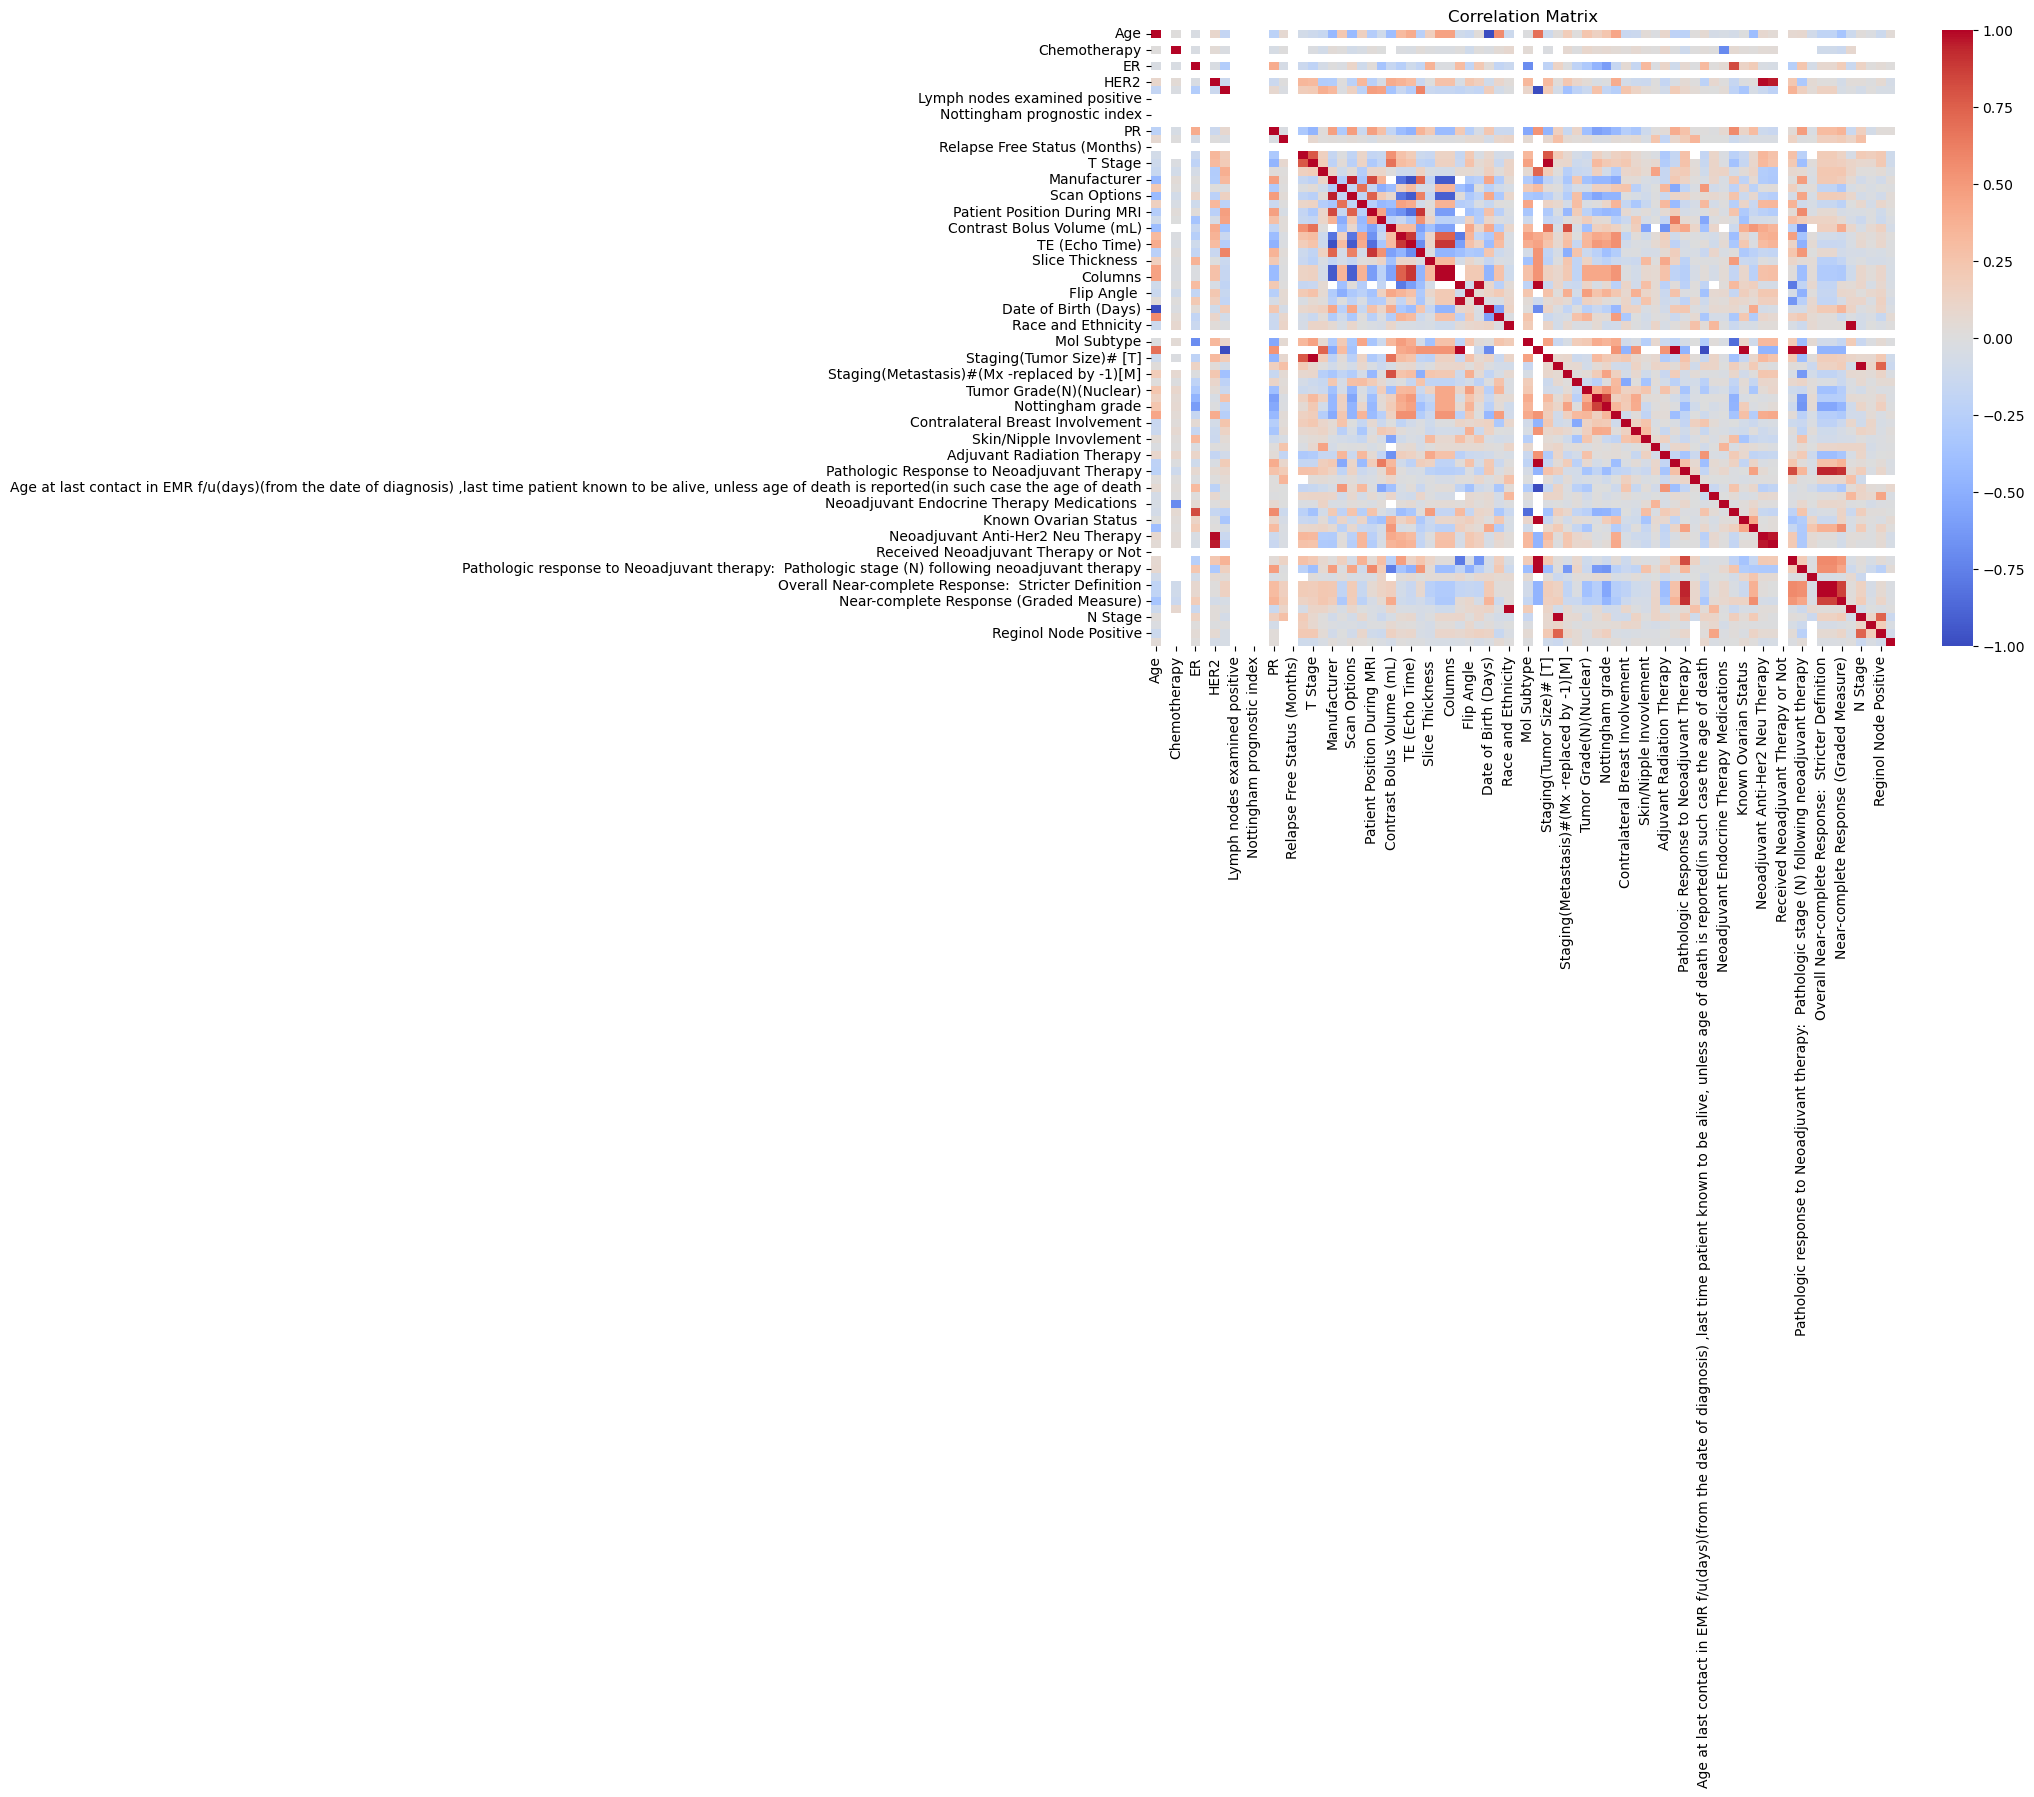

In [13]:
#Coorelation heatmap for numerical features

numeric_features = full_data_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Guassian and PCA

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define target
target_col = 'Overall Near-complete Response:  Stricter Definition'

# Drop columns with too many NaNs (>80%)
full_data_df = full_data_df.loc[:, full_data_df.isnull().mean() < 0.8]

# Keep only numeric columns and exclude the target
numeric_cols = full_data_df.select_dtypes(include=[np.number]).columns
features = numeric_cols.drop(target_col, errors='ignore')  # in case target_col isn't numeric

# Strategy 1: Drop rows with any NaNs
df_dropped = full_data_df[features.union([target_col])].dropna()

# Strategy 2: Fill numeric NaNs with mean
df_filled = full_data_df[features.union([target_col])].copy()
df_filled[features] = df_filled[features].fillna(df_filled[features].mean())

# Scale features only if rows exist
scaler = StandardScaler()

if not df_dropped.empty:
    df_dropped[features] = scaler.fit_transform(df_dropped[features])
else:
    print("No rows left in df_dropped after dropna().")

if not df_filled.empty:
    df_filled[features] = scaler.fit_transform(df_filled[features])
else:
    print("No rows left in df_filled after fillna().")

print(" Dropped dataset shape:", df_dropped.shape)
print(" Filled dataset shape:", df_filled.shape)


No rows left in df_dropped after dropna().
 Dropped dataset shape: (0, 67)
 Filled dataset shape: (572, 67)



Feature Subset Size: 3
Selected Features: ['Reginol Node Positive', 'Contrast Bolus Volume (mL)', 'Known Ovarian Status ']
Accuracy: 0.6174


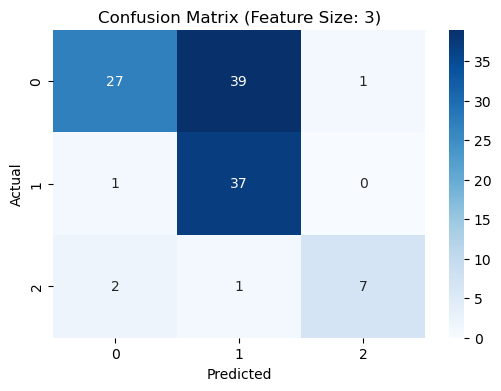


Feature Subset Size: 5
Selected Features: ['Recurrence event(s)', 'Adjuvant Radiation Therapy', 'Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy ', 'Mol Subtype', 'Race']
Accuracy: 0.5043


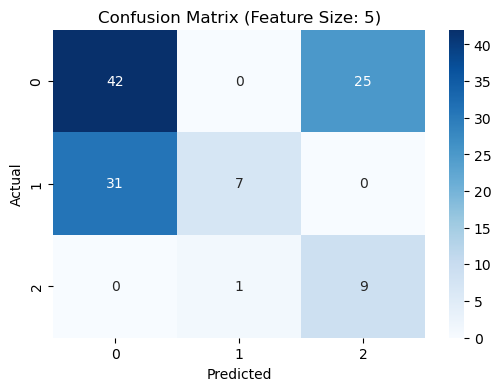


Feature Subset Size: 7
Selected Features: ['Pec/Chest Involvement', 'Skin/Nipple Invovlement', 'Columns', 'Chemotherapy', 'Race', 'Slice Thickness ', 'Manufacturer']
Accuracy: 0.5391


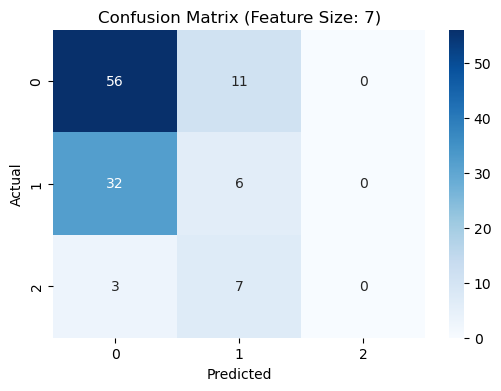


Feature Subset Size: 10
Selected Features: ['Survival Months', 'Neoadjuvant Anti-Her2 Neu Therapy', 'Pathologic response to Neoadjuvant therapy:  Pathologic stage (N) following neoadjuvant therapy', 'Reconstruction Diameter ', 'Staging(Tumor Size)# [T]', 'Scan Options', 'Tumor Grade(T) (Tubule)', 'Adjuvant Endocrine Therapy Medications ', 'Days to MRI (From the Date of Diagnosis)', 'Chemotherapy']
Accuracy: 0.6957


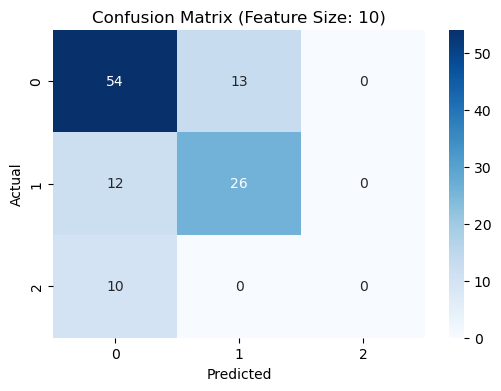

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Define features and target
X = df_filled[features]
y = df_filled[target_col]

# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index

X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Test different subset sizes
feature_sizes = [3,5, 7, 10]
results = {}

for size in feature_sizes:
    selected_features = random.sample(list(X.columns), size)
    
    model = GaussianNB()
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[size] = {
        "features": selected_features,
        "accuracy": acc,
        "conf_matrix": conf_matrix
    }
    
    print(f"\nFeature Subset Size: {size}")
    print("Selected Features:", selected_features)
    print(f"Accuracy: {acc:.4f}")
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (Feature Size: {size})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Naive Bayes Accuracy (All Features): 0.9913
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        67
         2.0       0.97      1.00      0.99        38
         3.0       1.00      0.90      0.95        10

    accuracy                           0.99       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.99      0.99      0.99       115



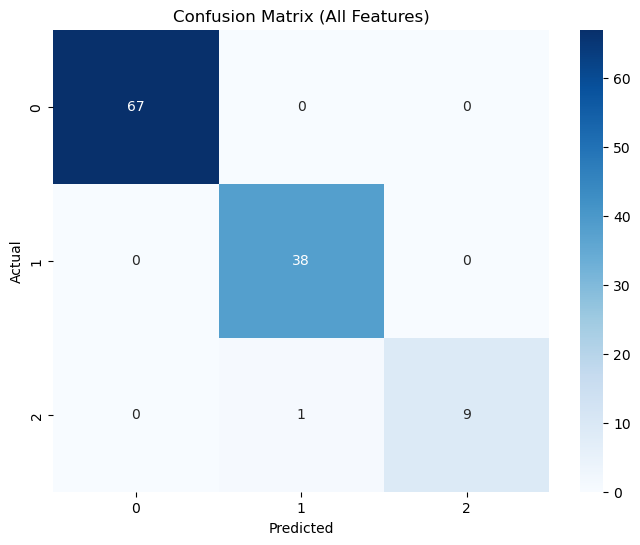

In [16]:
# Baseline model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train full-feature Naive Bayes model
model_full = GaussianNB()
model_full.fit(X_train, y_train)

# Predict on test set
y_pred_full = model_full.predict(X_test)

# Evaluate
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Naive Bayes Accuracy (All Features): {accuracy_full:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_full))

# Confusion Matrix
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (All Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


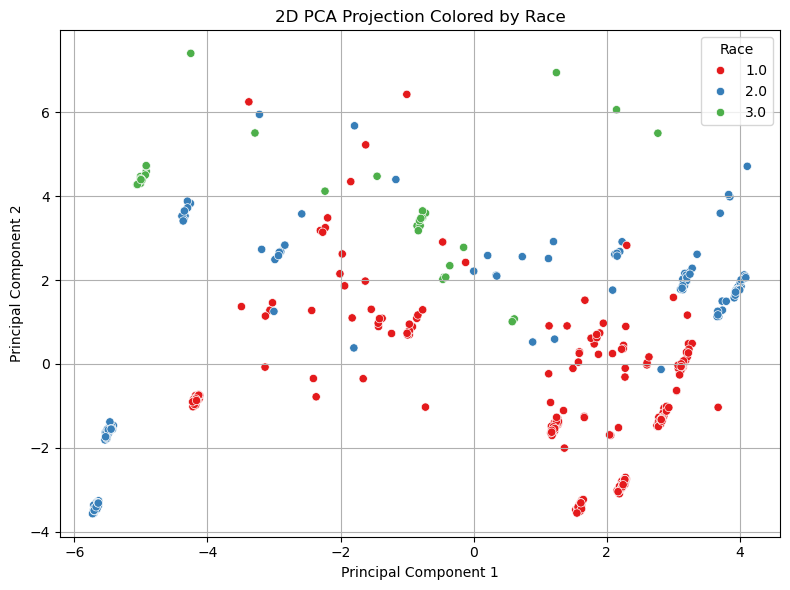

In [17]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
X_train_pca_2d = pca_vis.fit_transform(X_train)

# Plot PCA components colored by Race
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_2d[:, 0], y=X_train_pca_2d[:, 1], hue=y_train, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection Colored by Race")
plt.legend(title="Race")
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation

Number of PCA components selected: 23
Naive Bayes Accuracy (PCA Features): 0.9565


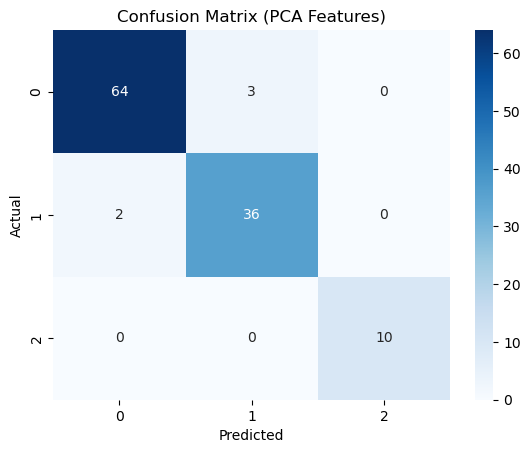

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.96      0.96        67
         2.0       0.92      0.95      0.94        38
         3.0       1.00      1.00      1.00        10

    accuracy                           0.96       115
   macro avg       0.96      0.97      0.97       115
weighted avg       0.96      0.96      0.96       115



In [18]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit PCA to retain 90% variance
pca_final = PCA(n_components=0.90)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

print(f"Number of PCA components selected: {pca_final.n_components_}")

# Train and predict
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Naive Bayes Accuracy (PCA Features): {acc_pca:.4f}")

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (PCA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_pca))
